In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy as sci
import json

# Primera medición de las cuadraturas del estado coherente

In [268]:
number_file_start = 168
number_file_finish = 179
V_init = 57.11 
V_finish = 58.83
Delta_V = V_finish - V_init
alpha = Delta_V/2*np.pi

Aquí, dado que $\Delta V = 2\pi\alpha $ donde $\alpha$ es una constante de proporcionalidad que pasa de grados a volts.

In [269]:
recorrido_number_file_names = range(number_file_start,number_file_finish+1)
lista_datos = [None]*len(recorrido_number_file_names)

In [270]:
def Gaussian(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))


index_lista_datos = 0
voltajes_tomados = np.array(range(0,12+1))*0.17
theta_tomados = voltajes_tomados*alpha
standard_dev = [None]*len(recorrido_number_file_names)
marginals = [None]*len(recorrido_number_file_names)
gaussianas = [None]*len(recorrido_number_file_names)

for i in recorrido_number_file_names:
    file_name = "tek0%sCH1.csv"%(i)
    print(file_name)
    lista_datos[index_lista_datos] = pd.read_csv("Datos/"+file_name,skiprows=20)
    quadrature[index_lista_datos] = lista_datos[index_lista_datos]["CH1"].mean()
    standard_dev[index_lista_datos] = lista_datos[index_lista_datos]["CH1"].std()
    marginals[index_lista_datos] = np.histogram(lista_datos[index_lista_datos]["CH1"],bins=13)
    
    parameters = curve_fit(Gaussian,marginals[index_lista_datos][1][1::],marginals[index_lista_datos][0])
    gaussianas[index_lista_datos] = parameters[0]
    

    
    index_lista_datos+=1

tek0168CH1.csv
tek0169CH1.csv
tek0170CH1.csv
tek0171CH1.csv
tek0172CH1.csv
tek0173CH1.csv
tek0174CH1.csv
tek0175CH1.csv
tek0176CH1.csv
tek0177CH1.csv
tek0178CH1.csv
tek0179CH1.csv


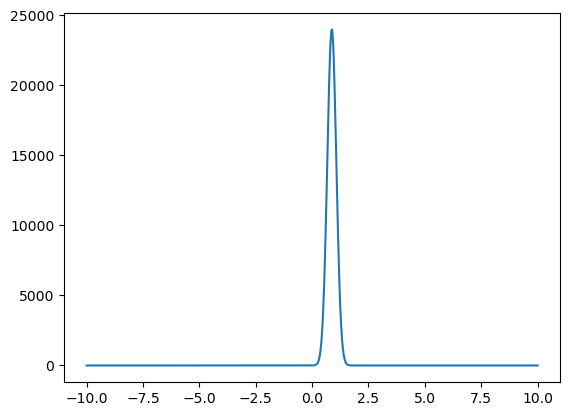

In [271]:
x_linspace_marginal = np.linspace(-10,10,1000)
plt.plot(x_linspace_marginal,Gaussian(x_linspace_marginal,gaussianas[index][0],gaussianas[index][1],gaussianas[index][2]))

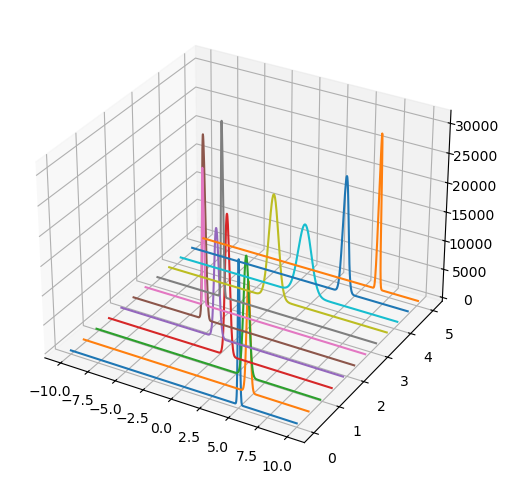

In [279]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,6))
index_lista_datos = 0
marginales_plot = np.array([None]*len(recorrido_number_file_names))
pr = [None]*len(recorrido_number_file_names)

for i in recorrido_number_file_names:
    pr[index_lista_datos] = Gaussian(x_linspace_marginal,gaussianas[index_lista_datos][0],gaussianas[index_lista_datos][1],gaussianas[index_lista_datos][2]).tolist()
    marginales_plot[index_lista_datos] = Gaussian(x_linspace_marginal,gaussianas[index_lista_datos][0],gaussianas[index_lista_datos][1],gaussianas[index_lista_datos][2])
    ax.plot(x_linspace_marginal,theta_tomados[index_lista_datos],marginales_plot[index_lista_datos])
    index_lista_datos += 1

In [280]:
x = x_linspace_marginal.tolist()
phi = theta_tomados.tolist()

In [281]:
pr

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [282]:
nombre_archivo = "coherente.json"

datos = {
    "phi": phi,
    "x": x,
    "pr": pr
}

with open(nombre_archivo, "w", encoding="utf-8") as archivo:
    json.dump(datos, archivo, indent=2)

print(f"Archivo '{nombre_archivo}' creado exitosamente.")


Archivo 'coherente.json' creado exitosamente.
